In [1]:
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Downloading the rps dataset from tensorflow
!wget = "https://storage.googleapis.com/download.tensorflow.org/data/rps.zip"
!wget = "https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip"

--2023-03-26 17:50:46--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-03-26 17:50:46--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 209.85.146.128, 209.85.147.128, 142.250.125.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|209.85.146.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip’

rps.zip             100%[===================>] 191.38M   208MB/s    in 0.9s    

2023-03-26 17:50:47 (208 MB/s) - ‘rps.zip’ saved [200682221/200682221]

FINISHED --2023-03-26 17:50:47--
Total wall clock time: 1.1s
Downloaded: 1 files, 191M in 0.9s (208 MB/s)
--2023-03-26 17:50:47--  http://=/
Resolving = (=)... failed: Name or service not known.
wget: unable to resolve host address ‘=’
--2023-03-26 17:50:47--  https://storage.googleapis.com/download.t

In [3]:
#Unzipping the dataset
import zipfile
import pathlib

zip_ref = zipfile.ZipFile("rps.zip", "r")
zip_ref.extractall()
zip_ref.close()

zip_ref = zipfile.ZipFile("rps-test-set.zip", "r")
zip_ref.extractall()
zip_ref.close()

In [4]:
train_ds = "rps"
test_ds = "rps-test-set"

In [5]:
data_dir = pathlib.Path(train_ds)
input_shape = (224, 224, 3)

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

#Creating a data pipeline with Data Augmentation
train_datagen = ImageDataGenerator(
                                   rescale = 1/255,
                                   rotation_range = 20,
                                   width_shift_range = 0.1,
                                   height_shift_range = 0.1,
                                   horizontal_flip = True
                                   )
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_ds,
                                               target_size = (224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

test_data = test_datagen.flow_from_directory(test_ds,
                                             target_size = (224, 224),
                                             batch_size = 32,
                                             class_mode = "categorical")

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [7]:
#Creating the model
model = tf.keras.Sequential([
    
    tf.keras.layers.Conv2D(5, (3,3), activation='relu', input_shape=input_shape),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),

    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(10, (3,3), activation='relu'),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units = 10, activation='relu'),
    tf.keras.layers.Dense(units = 3, activation='softmax')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 5)       140       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 5)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 10)      460       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 10)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

#Compiling the model
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [10]:
history = model.fit(train_data,
                        epochs = 5,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        verbose = 1)

Epoch 1/5
79/79 [==============================] - 48s 460ms/step - loss: 1.1573 - accuracy: 0.4063 - val_loss: 1.0010 - val_accuracy: 0.5215
Epoch 2/5
79/79 [==============================] - 33s 417ms/step - loss: 0.8044 - accuracy: 0.6571 - val_loss: 0.5047 - val_accuracy: 0.8172
Epoch 3/5
79/79 [==============================] - 34s 426ms/step - loss: 0.4517 - accuracy: 0.8210 - val_loss: 0.3077 - val_accuracy: 0.8952
Epoch 4/5
79/79 [==============================] - 32s 407ms/step - loss: 0.2919 - accuracy: 0.8881 - val_loss: 0.2486 - val_accuracy: 0.8952
Epoch 5/5
79/79 [==============================] - 34s 427ms/step - loss: 0.2412 - accuracy: 0.9131 - val_loss: 0.1669 - val_accuracy: 0.9409


<Figure size 432x288 with 0 Axes>

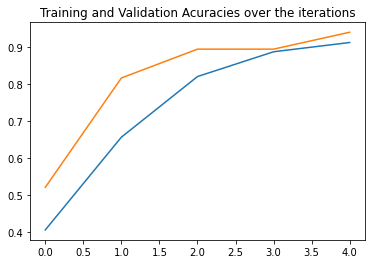

<Figure size 432x288 with 0 Axes>

In [11]:
#Let's vishualize the increase in accuracy as the model learns

acc = history.history['accuracy']
v_acc = history.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, v_acc)
plt.title('Training and Validation Acuracies over the iterations')
plt.figure()

In [12]:
#Let's try some more iterations, just to see what happens
history_2 = model.fit(train_data,
                        epochs = 30,
                        steps_per_epoch = len(train_data),
                        validation_data = test_data,
                        validation_steps = len(test_data),
                        verbose = 1)

Epoch 1/30
79/79 [==============================] - 37s 465ms/step - loss: 0.1906 - accuracy: 0.9349 - val_loss: 0.2093 - val_accuracy: 0.9194
Epoch 2/30
79/79 [==============================] - 33s 421ms/step - loss: 0.1842 - accuracy: 0.9409 - val_loss: 0.2274 - val_accuracy: 0.9032
Epoch 3/30
79/79 [==============================] - 32s 411ms/step - loss: 0.1666 - accuracy: 0.9440 - val_loss: 0.1229 - val_accuracy: 0.9435
Epoch 4/30
79/79 [==============================] - 33s 421ms/step - loss: 0.1441 - accuracy: 0.9512 - val_loss: 0.9790 - val_accuracy: 0.6989
Epoch 5/30
79/79 [==============================] - 33s 424ms/step - loss: 0.1014 - accuracy: 0.9639 - val_loss: 0.0997 - val_accuracy: 0.9543
Epoch 6/30
79/79 [==============================] - 34s 425ms/step - loss: 0.1282 - accuracy: 0.9607 - val_loss: 0.0377 - val_accuracy: 1.0000
Epoch 7/30
79/79 [==============================] - 32s 400ms/step - loss: 0.1234 - accuracy: 0.9615 - val_loss: 0.2156 - val_accuracy: 0.9247

<Figure size 432x288 with 0 Axes>

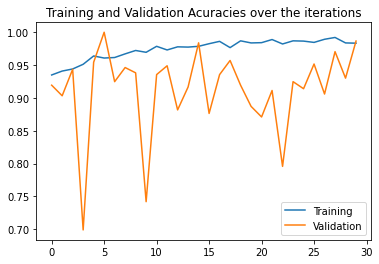

<Figure size 432x288 with 0 Axes>

In [14]:
acc = history_2.history['accuracy']
v_acc = history_2.history['val_accuracy']
epochs = range(len(acc))

plt.plot(epochs, acc, label = 'Training')
plt.plot(epochs, v_acc, label = 'Validation')
plt.title('Training and Validation Acuracies over the iterations')
plt.legend()
plt.figure()